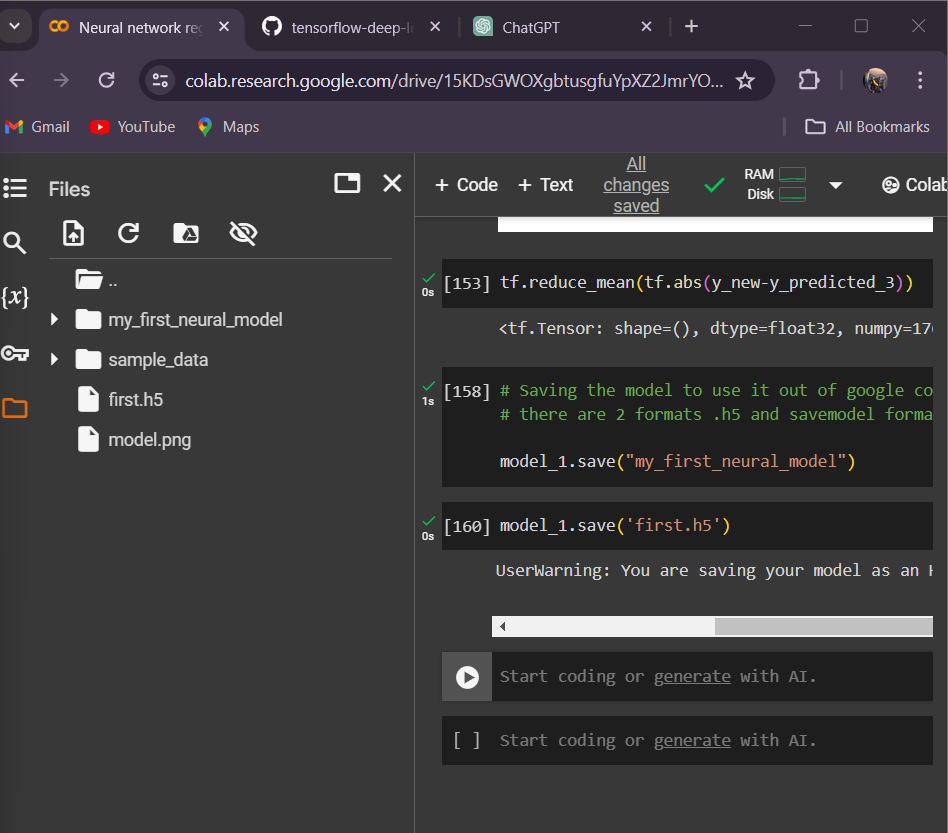**Introduction to regression with neural networks**

we are going to predict the price (numerical) of a house
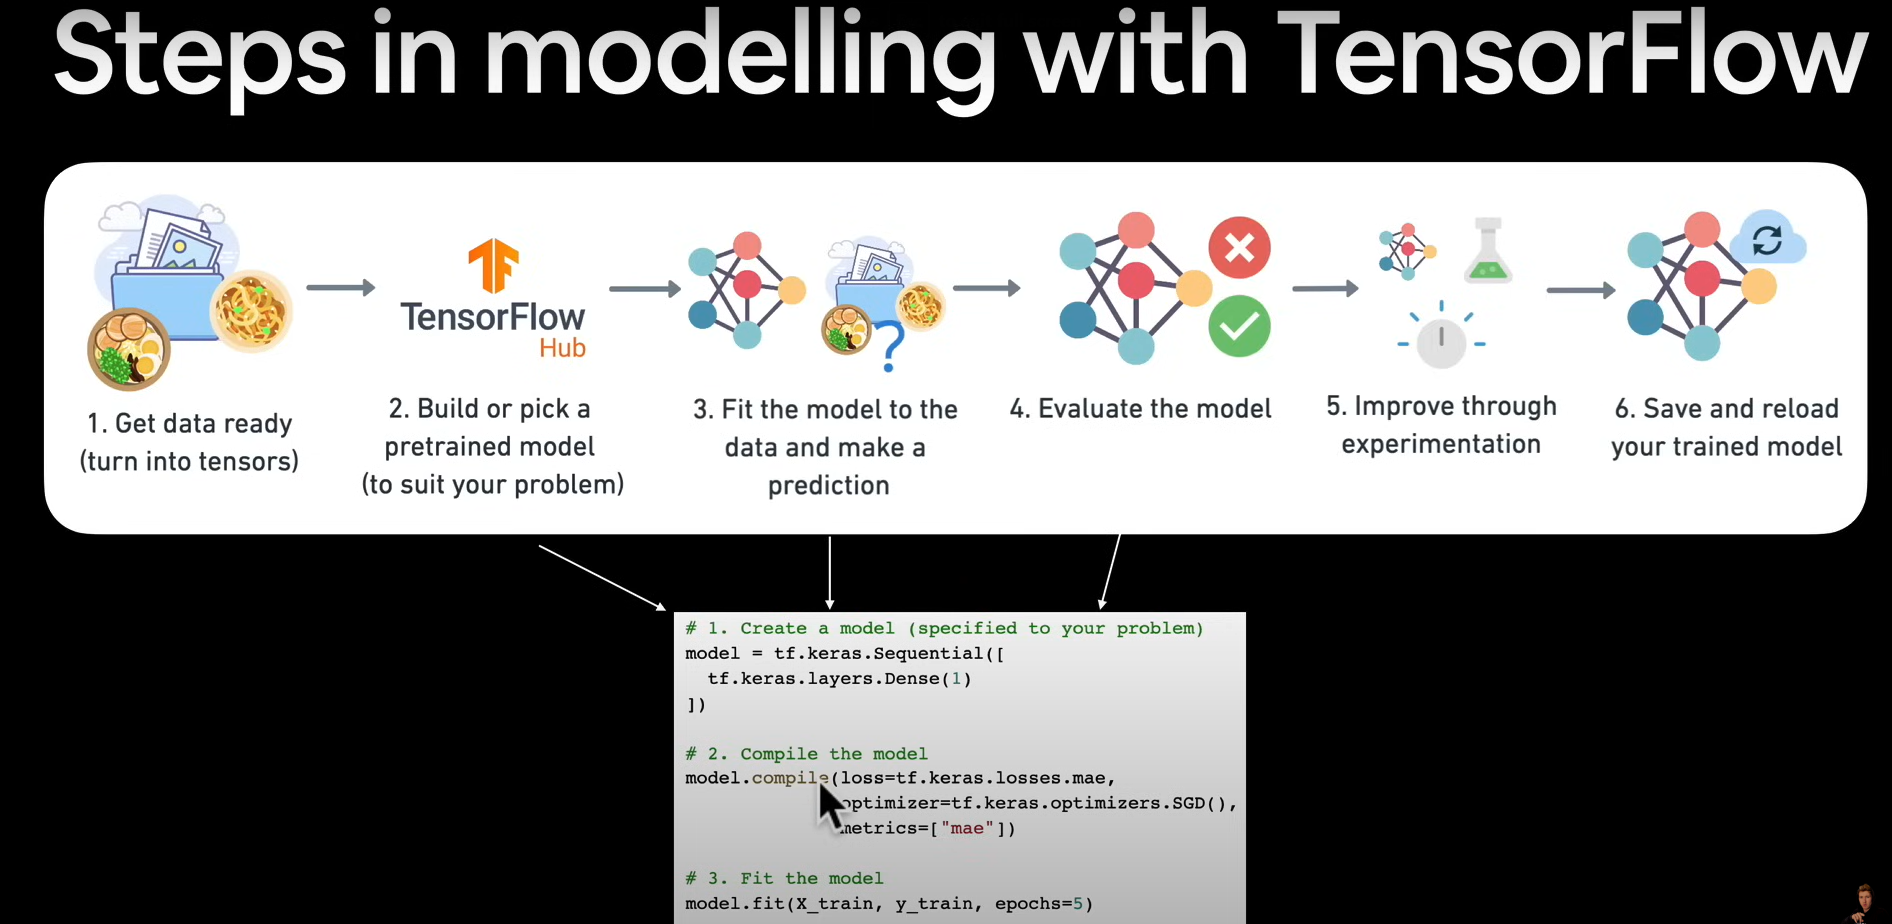




In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Creating data to view nd fit

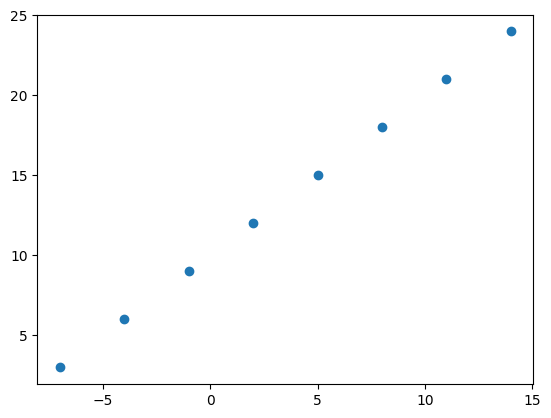

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [5]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

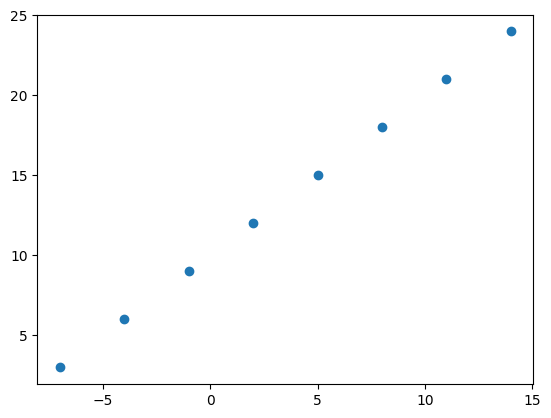

In [6]:
plt.scatter(x,y)

# Input and output shapes

In [7]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom",'bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = x.shape
output_shape = y.shape

In [9]:
#turning numpy array into tebsor
x = tf.constant(x)
y = tf.constant(y)

In [10]:
input_shape = x[0].shape
output_shape = y[0].shape

In [11]:
x.ndim

1

# steps in modelling the tensorflow
1.creating the model
2.compiling the model
3.fitting the model


In [12]:
tf.random.set_seed(42)

In [13]:
# here there is issue of dimension i.e x must have dimension of minimum 2 threfore tf.expand_dims is used

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 462ms/step - loss: 14.8345 - mae: 14.8345
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.7020 - mae: 14.7020
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 14.5695 - mae: 14.5695
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.4370 - mae: 14.4370
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.3045 - mae: 14.3045


In [15]:
# Check out X and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
y_pred = model.predict([14.0]) #doesnt find the cirrent pattern

1/1 [==============================] - 0s 96ms/step


# Improving the model

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=200) # train for 100 epochs not 10

Epoch 1/200
1/1 [==============================] - 0s 353ms/step - loss: 16.6451 - mae: 16.6451
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 16.3639 - mae: 16.3639
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 16.0826 - mae: 16.0826
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 15.8014 - mae: 15.8014
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 15.5201 - mae: 15.5201
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 15.2389 - mae: 15.2389
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 14.9576 - mae: 14.9576
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 14.7580 - mae: 14.7580
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 14.6255 - mae: 14.6255
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 14.4930 - mae: 14.4930
Epoch 11/200
1/1 [==============================

In [18]:
model.predict([17.0]) # exact answer is 27 we got 30

1/1 [==============================] - 0s 69ms/step


array([[30.38723]], dtype=float32)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation = None)  ,
  tf.keras.layers.Dense(50,activation = None) ,
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 780ms/step - loss: 13.6120 - mae: 13.6120
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2893 - mae: 13.2893
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9678 - mae: 12.9678
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6475 - mae: 12.6475
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3280 - mae: 12.3280
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0092 - mae: 12.0092
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6907 - mae: 11.6907
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3721 - mae: 11.3721
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0531 - mae: 11.0531
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7335 - mae: 10.7335
Epoch 11/100
1/1 [==============================

In [20]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
model.predict([17])

1/1 [==============================] - 0s 126ms/step


array([[30.920774]], dtype=float32)

#Evaluating the model
 in practuce typical workflow is
 build-fit-evaluate-tweak-fit-evaluate-tweak repeat

 tweak is improve

In [22]:
# addin the neural layers just increased the overfitting

In [50]:
# for more data the better it wud perform
x = tf.range(-100,100,4)
y = x+3

In [51]:
x = tf.constant(x)
y = tf.constant(y)

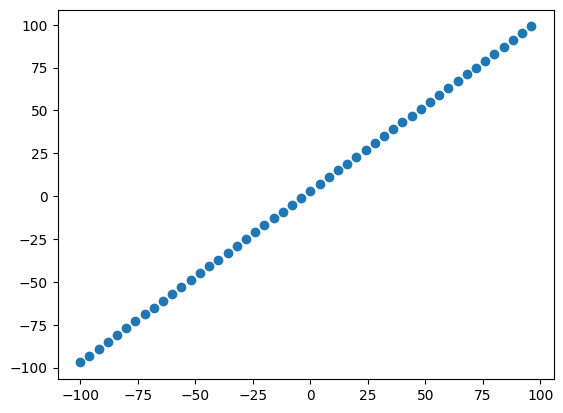

In [25]:
plt.scatter(x,y)

In [26]:
len(x)

50

In [27]:

x_train = x[:40]
y_train = y[:40]
x_valid = x[40:]
y_valid = y[40:]


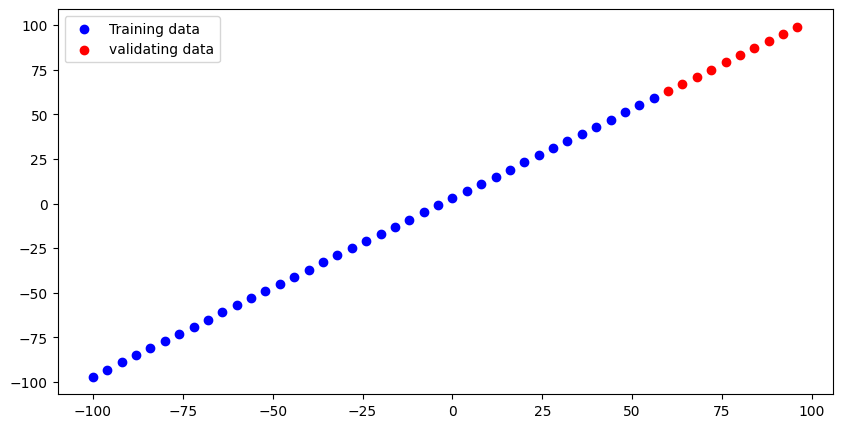

In [52]:
plt.figure(figsize = (10,5))
plt.scatter(x_train,y_train,c='b',label = "Training data")
plt.scatter(x_valid,y_valid,c = 'r',label = "validating data")
plt.legend()

In [29]:
# lets build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [30]:
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 107.0814 - mae: 107.0814
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 71.0974 - mae: 71.0974
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.9765 - mae: 32.9765
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 4.5242 - mae: 4.5242
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0127 - mae: 9.0127
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 6.6790 - mae: 6.6790
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 4.3155 - mae: 4.3155
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6898 - mae: 8.6898
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 16.5137 - mae: 16.5137
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 4.4513 - mae: 4.4513
Epoch 11/100
2/2 [==============================] - 0s 14ms/step - lo

In [31]:
# lets build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(120,activation = None),
      tf.keras.layers.Dense(90,activation = None),
      tf.keras.layers.Dense(200,activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])
model.fit(tf.expand_dims(x_train,axis = -1),y_train,epochs = 200)

Epoch 1/200
2/2 [==============================] - 1s 9ms/step - loss: 35.0513 - mae: 35.0513
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 6.6098 - mae: 6.6098
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 19.8068 - mae: 19.8068
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 9.1108 - mae: 9.1108
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 6.2553 - mae: 6.2553
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 9.4342 - mae: 9.4342
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 5.3832 - mae: 5.3832
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 4.4967 - mae: 4.4967
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 5.5052 - mae: 5.5052
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 2.9701 - mae: 2.9701
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 4.8

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                100       
                                                                 
 dense_7 (Dense)             (None, 120)               6120      
                                                                 
 dense_8 (Dense)             (None, 90)                10890     
                                                                 
 dense_9 (Dense)             (None, 200)               18200     
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 35511 (138.71 KB)
Trainable params: 35511 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.predict([40.0])

1/1 [==============================] - 0s 103ms/step


array([[41.860737]], dtype=float32)

In [34]:
# evaluation
y_preds = model.predict(x_valid)

1/1 [==============================] - 0s 70ms/step


In [35]:
# for regression
from sklearn.metrics import r2_score

In [36]:
r2_score(y_preds,y_valid)

0.9643184666115163

In [37]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_valid,y_preds))

2.115617747166304

In [38]:
x_test = np.random.random(x_valid.shape)
y_test = x_test+3
y_preds = model.predict(x_test)

1/1 [==============================] - 0s 22ms/step


In [39]:
r2_score(y_test,y_preds)

-5.260331361011834

In [40]:
np.sqrt(mean_squared_error(y_test,y_preds))

0.7233852420689887

In [41]:
# dense is for fully connected layer
# total params  = total _params in model
# trainable params = total params to train
# if we have pre build model then it is non trainable params


In [42]:
model.layers[3].get_weights()[1]

array([ 0.0804355 , -0.08115566, -0.07982246, -0.0801379 ,  0.08024354,
       -0.07984191,  0.08055107, -0.07903465, -0.07690717,  0.07907869,
        0.07920469,  0.0805537 , -0.07971097,  0.08052021,  0.07819176,
       -0.07638322,  0.07872008, -0.08026256,  0.00864071, -0.04719752,
       -0.07939649, -0.08008087, -0.07867645,  0.07478599, -0.08141141,
        0.08008081, -0.03782343,  0.07714628,  0.08026384,  0.07867884,
        0.08030038, -0.08017269,  0.07997648, -0.08036259, -0.07662839,
        0.08018766, -0.0695439 ,  0.07820912, -0.080271  , -0.07961152,
        0.0800212 ,  0.07545894,  0.08030353,  0.07936576,  0.07934697,
        0.07077724, -0.08036922,  0.08017243, -0.07963816,  0.08054549,
        0.0783105 ,  0.0869194 ,  0.08032102, -0.08064612,  0.07952812,
       -0.05915597,  0.07940076, -0.08026054, -0.08001135,  0.0802909 ,
       -0.07800188,  0.08039364,  0.07963921, -0.07865565,  0.08012885,
       -0.08015343, -0.07976054,  0.07917895,  0.08027136,  0.08

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                100       
                                                                 
 dense_7 (Dense)             (None, 120)               6120      
                                                                 
 dense_8 (Dense)             (None, 90)                10890     
                                                                 
 dense_9 (Dense)             (None, 200)               18200     
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 35511 (138.71 KB)
Trainable params: 35511 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


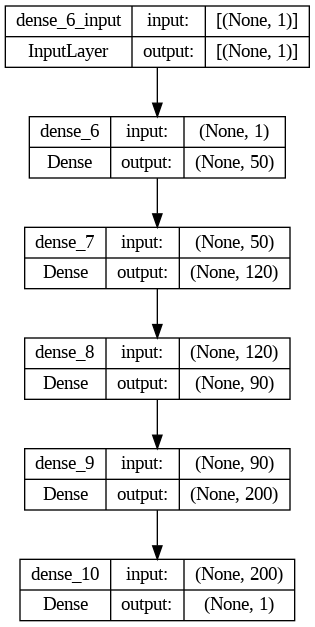

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)

In [45]:
# experimenting now

1. Get more data
2. Make model largers using complex models
3. Train for longer

model-1 :1 layerr 100 epochs

model_2 :2 layer 100 epochs


model_3 :3 layers and 500 epochs


In [98]:
# build model_1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])
model_1.fit(tf.expand_dims(x_train,axis = -1),y_train,epochs = 200)

Epoch 1/200
2/2 [==============================] - 0s 13ms/step - loss: 13.3964 - mae: 13.3964
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 13.3096 - mae: 13.3096
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 13.2262 - mae: 13.2262
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 13.1406 - mae: 13.1406
Epoch 5/200
2/2 [==============================] - 0s 15ms/step - loss: 13.0571 - mae: 13.0571
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 12.9727 - mae: 12.9727
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 12.8876 - mae: 12.8876
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 12.7996 - mae: 12.7996
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 12.7171 - mae: 12.7171
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 12.6346 - mae: 12.6346
Epoch 11/200
2/2 [==============================] - 0s 8

In [97]:
x = tf.range(-100,100,4)
y = x+3
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]

In [99]:
y_preds_1 = model_1.predict(x_test)

1/1 [==============================] - 0s 44ms/step


In [154]:
def plot_preds(y_preds,x_test,y_test):
  plt.figsize = (100,100)
 # plt.scatter(x_train,y_train,c = 'b',label = 'training data', s= 3)
  plt.scatter(x_test,y_test,c = 'g',label = 'training data',s = 10)
  plt.scatter(x_test,y_preds,c = 'r',label = 'predicted data',s = 5)
  plt.legend()
  plt.show()
  return

In [101]:
model_1.evaluate(x_test,y_test)


1/1 [==============================] - 0s 160ms/step - loss: 5.5430 - mae: 5.5430


[5.543002128601074, 5.543002128601074]

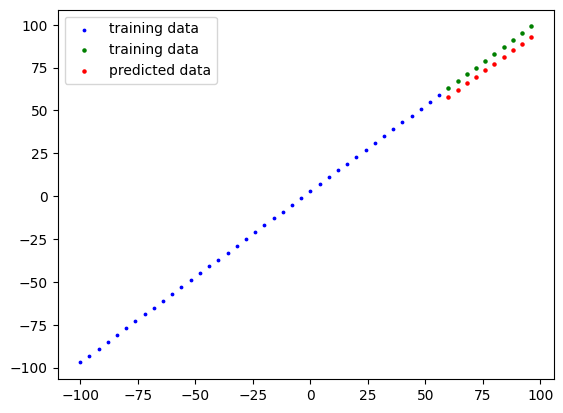

In [104]:
plot_preds(y_preds = y_preds_1,x_train=x_train,x_test=x_test,y_test=y_test,y_train=y_train)

In [108]:
mae = tf.metrics.mean_absolute_error(y_test,y_preds_1)

In [106]:
tf.reduce_mean(tf.abs(y_test-y_preds_1))

<tf.Tensor: shape=(), dtype=int32, numpy=13>

In [95]:
# thats a kinda overfitted data it seems haha but mae is bit more soooo shud optimize

In [124]:
x_new = tf.random.uniform(maxval = 760,minval = 250,shape = x_train.shape)

In [125]:
y_new = x_new+3
y_predicted_1 = model_1.predict(x_new)

2/2 [==============================] - 0s 5ms/step


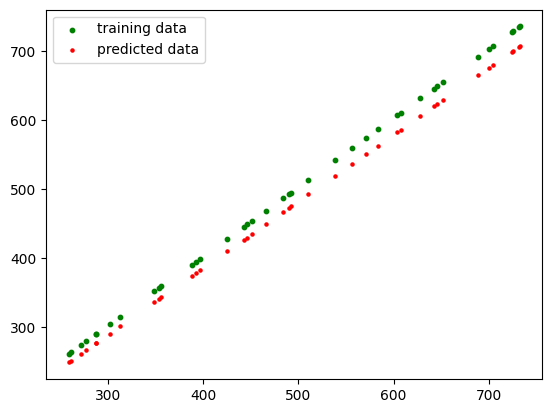

In [155]:
plot_preds(y_preds = y_predicted_1,x_test=x_new,y_test=y_new)

In [116]:
# the model is almost working well but optimization wud help

In [117]:
tf.reduce_mean(tf.abs(y_new-y_predicted_1))

<tf.Tensor: shape=(), dtype=float32, numpy=150.29218>

# model 2


In [142]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation = None),
    tf.keras.layers.Dense(20,activation = None),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])
model_2.fit(tf.expand_dims(x,axis = -1),y,epochs = 300)

Epoch 1/300
2/2 [==============================] - 2s 11ms/step - loss: 39.4296 - mae: 39.4296
Epoch 2/300
2/2 [==============================] - 0s 11ms/step - loss: 35.7562 - mae: 35.7562
Epoch 3/300
2/2 [==============================] - 0s 11ms/step - loss: 32.5209 - mae: 32.5209
Epoch 4/300
2/2 [==============================] - 0s 12ms/step - loss: 29.0066 - mae: 29.0066
Epoch 5/300
2/2 [==============================] - 0s 10ms/step - loss: 25.5039 - mae: 25.5039
Epoch 6/300
2/2 [==============================] - 0s 10ms/step - loss: 22.0728 - mae: 22.0728
Epoch 7/300
2/2 [==============================] - 0s 10ms/step - loss: 18.4550 - mae: 18.4550
Epoch 8/300
2/2 [==============================] - 0s 10ms/step - loss: 14.9649 - mae: 14.9649
Epoch 9/300
2/2 [==============================] - 0s 10ms/step - loss: 11.6846 - mae: 11.6846
Epoch 10/300
2/2 [==============================] - 0s 10ms/step - loss: 8.0751 - mae: 8.0751
Epoch 11/300
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step


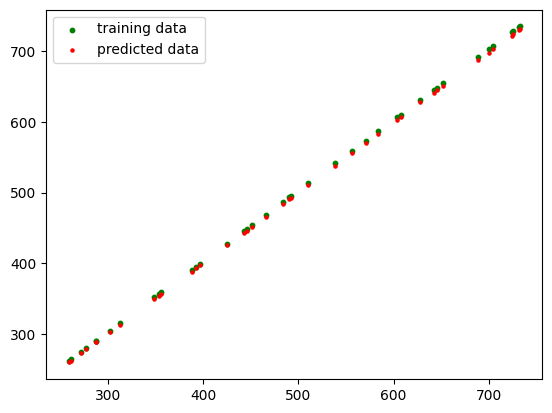

In [156]:
y_predicted_2 = model_2.predict(x_new)
plot_preds(y_preds = y_predicted_2,x_test=x_new,y_test=y_new)

In [144]:
tf.reduce_mean(tf.abs(y_new-y_predicted_2))

<tf.Tensor: shape=(), dtype=float32, numpy=176.35353>

In [145]:
# still model_1 got lower mae than model_2 haha so as low the dense layer is that good it is

In [151]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation = None),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])
model_3.fit(tf.expand_dims(x,axis = -1),y,epochs =500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 38.7451 - mae: 38.7451
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 37.8385 - mae: 37.8385
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 37.0397 - mae: 37.0397
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 36.1761 - mae: 36.1761
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 35.3176 - mae: 35.3176
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 34.4794 - mae: 34.4794
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 33.5967 - mae: 33.5967
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 32.7478 - mae: 32.7478
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 31.9466 - mae: 31.9466
Epoch 10/500
2/2 [==============================] - 0s 18ms/step - loss: 31.0615 - mae: 31.0615
Epoch 11/500
2/2 [==============================] -

2/2 [==============================] - 0s 6ms/step


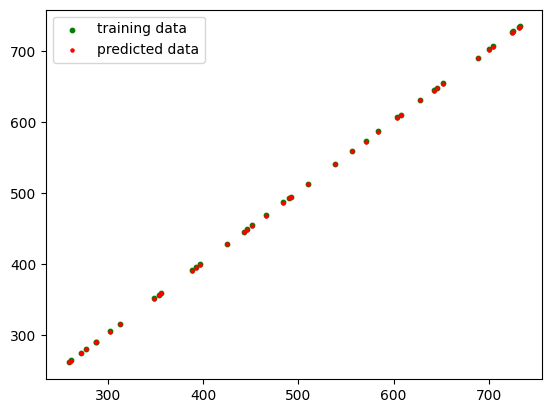

In [157]:
y_predicted_3 = model_3.predict(x_new)
plot_preds(x_test = x_new,y_test=y_new,y_preds = y_predicted_3)

In [153]:
tf.reduce_mean(tf.abs(y_new-y_predicted_3))

<tf.Tensor: shape=(), dtype=float32, numpy=176.70135>

In [158]:
# Saving the model to use it out of google colab
# there are 2 formats .h5 and savemodel format

model_1.save("my_first_neural_model")

In [160]:
model_1.save('first.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [162]:
load_saved= tf.keras.models.load_model('/content/my_first_neural_model')

In [164]:
load_saved.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [165]:
load_saved= tf.keras.models.load_model('/content/first.h5')

In [167]:
load_saved.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Download model from google colab
1. click download haha
2. using colab
3. mount google drive and then save it

In [170]:
from google.colab import files
files.download("/content/model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
from google.colab import files
files.download('Neural network regression.ipynb')


FileNotFoundError: Cannot find file: Neural network regression.ipynb